In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('D:\datasets\Stress.csv')
df.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087


In [2]:
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [3]:
df.shape

(2838, 7)

In [4]:
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [5]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [6]:
df2 = df.drop(columns=['subreddit','post_id','post_id','confidence','social_timestamp','sentence_range'], axis=1)
df2

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from nltk.corpus import stopwords

In [9]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sozha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stemmer=nltk.SnowballStemmer('english')

In [11]:
from nltk.corpus import stopwords
import string 
stopwords = set(stopwords.words('english'))

In [12]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '',text)
    text=re.sub('<.*?>+', '',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [13]:
df2["text"]=df2["text"].apply(clean)

In [14]:
df2.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,1
1,hey rassist sure right place post goe im curr...,0
2,mom hit newspap shock would know dont like pla...,1
3,met new boyfriend amaz kind sweet good student...,1
4,octob domest violenc awar month domest violenc...,1


In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

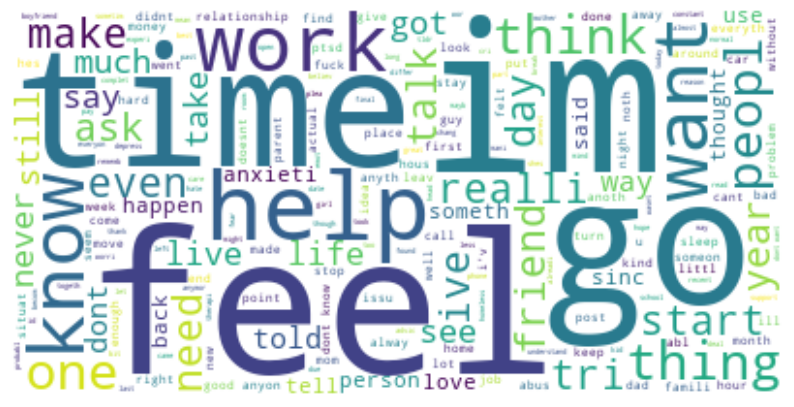

In [17]:
text= " ".join(i for i in df2.text)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
df2['label']=df2['label'].map({'No_stress':0,'stress':1})

In [23]:
df2

,text,label
0,said felt way sugget go rest trigger ahead you...,1
1,hey rassist sure right place post goe im curr...,0
2,mom hit newspap shock would know dont like pla...,1
3,met new boyfriend amaz kind sweet good student...,1
4,octob domest violenc awar month domest violenc...,1
...,...,...
2833,week ago precious ignor jan happi year prec...,0
2834,dont abil cope anymor im tri lot thing trigger...,1
2835,case first time your read post look peopl will...,0
2836,find normal good relationship main problem see...,0


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [26]:
x=np.array(df2['text'])
y=np.array(df2['label'])


In [27]:
cv=CountVectorizer()


In [28]:
x=cv.fit_transform(x)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [30]:
pip install sklearn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [78]:
model=BernoulliNB()

In [79]:
model.fit(x_train, y_train)


BernoulliNB()

In [80]:
from sklearn.metrics import accuracy_score


In [81]:
prediction=model.predict(x_test)


In [82]:
score=accuracy_score(prediction,y_test)

In [83]:
score


0.7517605633802817

In [84]:
y_test[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [85]:
prediction[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [86]:
df2.head(1)

,text,label
0,said felt way sugget go rest trigger ahead you...,1


In [87]:
ip = df2['text'][0]
ip

'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour'

In [88]:
type(ip)

str

In [89]:
ip_clean = clean(ip)
ip_clean

'said felt way sugget go rest trigger ahead youir hypocondriac decid look feel doom hope mayb suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth even laugh road end read sen doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour'

In [90]:
ip_arr = np.array([ip_clean])
# ip_arr = ip_arr.reshape(-1,1)

In [91]:
ip_arr_cv = cv.transform(ip_arr)
ip_arr_cv

<1x7842 sparse matrix of type '<class 'numpy.int64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [92]:
model.predict(ip_arr_cv)

array([1], dtype=int64)

In [99]:
ip = input()
ip_clean = clean(ip)
ip_arr = np.array([ip_clean])
ip_arr_cv = cv.transform(ip_arr)
pred = model.predict(ip_arr_cv)
print(pred)
if pred==1:
    print('Stress')
else:
    print('No Stress')
    

 feeling bad 


[1]
Stress
